# Proyecto de aprendizaje automático

Al fin han concedido un proyecto para tu *startup* de analítica con amplios conocimientos de aprendizaje automático y AI!!!! 

La **compañía de hoteles Disfrutín**, con hoteles ubicados por todo el mundo, está interesada en que construyas un modelo de clasificación de cancelaciones basándote en variables disponibles.

Para ello te ha proporcionado tres tablas:
- `bookings.csv`: contiene información de reservas
- `hotels.csv`:  contiene información sobre características de los hoteles
- `people.csv`: contiene información sobre los clientes del hotel

**La variable objetivo a estudiar es `is_canceled` y se ubica en la tabla `bookings`**

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [137]:
book = pd.read_csv('bookings.csv')
hotel = pd.read_csv('hotels.csv')
ppl = pd.read_csv('people.csv')

In [138]:
book.head()

,booking_id,name,hotel,booking_timestamp,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,total_cost,is_canceled
0,cab0388e-1264-4029-be95-19739edea0f4,Marcia Salazar,EUZ,2022-11-19 00:48:25,1,single,0,2023-01-10,2023-01-24,1,873.17,False
1,d82441af-f8de-4f23-805a-960c2b2eca4c,Shawn Campbell,SQC,2022-11-15 17:19:27,2,triple,1,2022-12-25,2022-12-26,6,329.69,False
2,2ee5cafb-827a-4abc-b06f-8275440d6e2e,Laurie Morton,ZDC,2022-07-10 14:21:44,2,suite,0,2022-08-16,2022-08-24,2,6330.86,True
3,1269ef8c-5a35-423b-8b73-556183605dcb,Catherine Ellis,GZD,2022-10-06 10:23:33,1,single,1,2022-11-20,2022-12-02,1,805.58,False
4,7100d522-cccb-47b8-9e0d-ee4e83e934c9,Ryan Cameron,TXL,2022-03-12 01:26:47,2,double,0,2022-05-15,2022-05-27,4,2583.24,False


In [139]:
book.shape

(5000, 12)

In [140]:
hotel.head()

,hotel,hotel_country,has_pool,has_spa,has_theatre,stars
0,PLP,Japan,True,True,False,1
1,HHO,Chad,False,False,True,5
2,IKL,Sierra Leone,False,False,True,2
3,CSM,Bangladesh,False,True,True,5
4,PQL,Fiji,False,False,False,4


In [141]:
ppl.head()

,name,country,date_of_birth
0,Todd Floyd,Malaysia,1995-12-14
1,Anthony Scott,Bangladesh,1996-08-04
2,Megan Martinez,Niger,1968-04-13
3,Carmen Hall,Cote d'Ivoire,1990-03-07
4,Ryan Miller,Malawi,1967-08-24


In [142]:
ppl.shape

(2100, 3)

## Creación de conjuntos de datos

- Construye el conjunto de datos final basándote en las tres tablas proporcionadas, haciendo **merge** basado en las columnas naturales (`hotel` y `name`)
- Realiza una EDA con las agrupaciones que consideres y gráficos para intentar ver la influencia de algunas variables sobre la variable objetivo.
- Realiza ingeniería de atributos para ampliar los atributos iniciales con un mayor conjunto.
- Realiza una EDA para observar el impacto potencial de las variables creadas sobre la variable objetivo.

Tras este proceso, puede que tengas alguna idea de qué variables se pueden usar, cuáles son mejores predictores potenciales para estimar si se cancela o no la reserva, así como cuáles son categóricas, y cuáles son dummies.

- Genera la tabla final con todas las variables categóricas que correspondan transformadas en dummies.

### EDA inicial

In [143]:
book.isnull().sum()

booking_id           0
name                 0
hotel                0
booking_timestamp    0
n_rooms              0
room_type            0
children             0
arrival_timestamp    0
leave_timestamp      0
guests               0
total_cost           0
is_canceled          0
dtype: int64

In [144]:
hotel.isnull().sum()

hotel            0
hotel_country    0
has_pool         0
has_spa          0
has_theatre      0
stars            0
dtype: int64

In [145]:
ppl.isnull().sum()

name             0
country          0
date_of_birth    0
dtype: int64

In [244]:
df = book.merge(ppl, on='name', how='left').merge(hotel, on = 'hotel', how ='left')
df.head()

,booking_id,name,hotel,booking_timestamp,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,total_cost,is_canceled,country,date_of_birth,hotel_country,has_pool,has_spa,has_theatre,stars
0,cab0388e-1264-4029-be95-19739edea0f4,Marcia Salazar,EUZ,2022-11-19 00:48:25,1,single,0,2023-01-10,2023-01-24,1,873.17,False,Guam,1970-01-26,Bouvet Island (Bouvetoya),True,False,True,1
1,d82441af-f8de-4f23-805a-960c2b2eca4c,Shawn Campbell,SQC,2022-11-15 17:19:27,2,triple,1,2022-12-25,2022-12-26,6,329.69,False,Nauru,2002-09-23,Cote d'Ivoire,False,True,True,2
2,2ee5cafb-827a-4abc-b06f-8275440d6e2e,Laurie Morton,ZDC,2022-07-10 14:21:44,2,suite,0,2022-08-16,2022-08-24,2,6330.86,True,Palau,1954-01-14,Malaysia,False,True,True,1
3,1269ef8c-5a35-423b-8b73-556183605dcb,Catherine Ellis,GZD,2022-10-06 10:23:33,1,single,1,2022-11-20,2022-12-02,1,805.58,False,Sierra Leone,1973-12-21,Mexico,True,True,True,4
4,7100d522-cccb-47b8-9e0d-ee4e83e934c9,Ryan Cameron,TXL,2022-03-12 01:26:47,2,double,0,2022-05-15,2022-05-27,4,2583.24,False,Tokelau,1950-08-31,Mauritania,False,True,True,1


In [147]:
df.shape

(5000, 19)

In [245]:
df['is_canceled'] = df['is_canceled'].astype(int)
df['has_pool'] = df['has_pool'].astype(int)
df['has_spa'] = df['has_spa'].astype(int) 
df['has_theatre'] = df['has_theatre'].astype(int)

In [149]:
df.sample(3)

,booking_id,name,hotel,booking_timestamp,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,total_cost,is_canceled,country,date_of_birth,hotel_country,has_pool,has_spa,has_theatre,stars
3744,4abf5fdd-a095-4e41-a4b2-25195d0ef162,Carrie Johnson,BXO,2022-10-24 19:23:02,4,triple,2,2022-11-03,2022-11-04,12,663.19,1,Malaysia,1974-07-24,Niger,1,0,0,5
1863,98a4c505-70e1-44e8-9266-9addc0f3054d,David Ramirez,PEV,2022-04-18 14:40:20,1,triple,0,2022-06-17,2022-06-25,3,1277.51,0,Chad,1986-04-12,Belarus,0,1,1,3
2051,9260f9d9-7a3a-452c-8381-efce0381e949,Nancy Hogan,GZD,2022-04-03 00:15:29,2,single,0,2022-06-05,2022-06-14,2,1456.12,1,Malawi,1964-05-13,Mexico,1,1,1,4


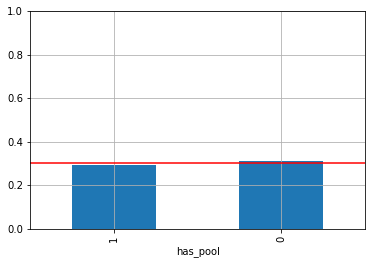

In [384]:
df.groupby('has_pool').is_canceled.mean().sort_values().plot.bar(ylim=(0,1))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

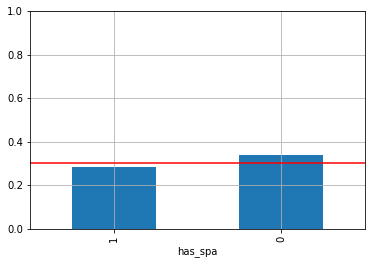

In [385]:
df.groupby('has_spa').is_canceled.mean().sort_values().plot.bar(ylim=(0,1))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

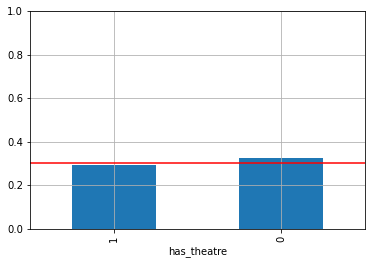

In [386]:
df.groupby('has_theatre').is_canceled.mean().sort_values().plot.bar(ylim=(0,1))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

Parece que las instalaciones que posea el hotel no son variables determinantes a la hora de cancelar la reserva.

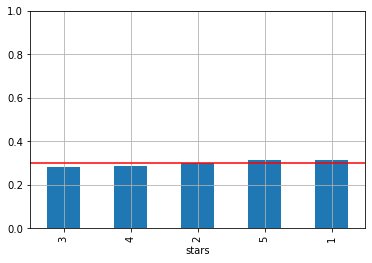

In [150]:
df.groupby('stars').is_canceled.mean().sort_values().plot.bar(ylim=(0,1))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

Se puede apreciar que el número de estrellas que tiene el hotel no es significativo para que tenga lugar la cancelación de la reserva, ya que todos presentan un porcentaje medio similar de cancelaciones tal y como se muestra en la gráfica.

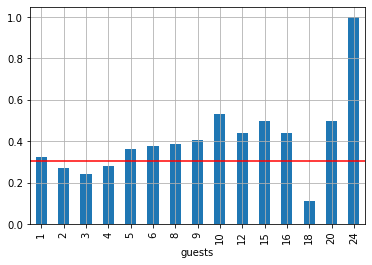

In [151]:
df.groupby('guests').is_canceled.mean().plot.bar()
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

En general, se produce un aumento de las cancelaciones cuando el número de invitados es alto. Por lo que esta variable sería interesante estudiarla más en adelante.

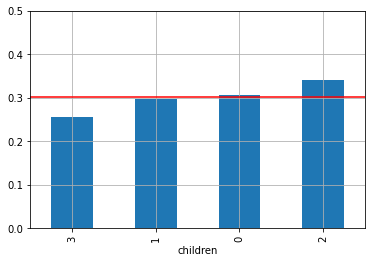

In [152]:
df.groupby('children').is_canceled.mean().sort_values().plot.bar(ylim=(0,0.5))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

Parece que el número de niños no afecta demasiado en la cancelación de la reserva.

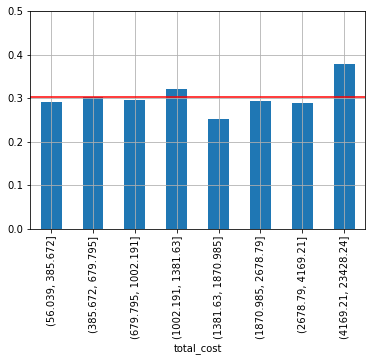

In [153]:
df.groupby(pd.qcut(df.total_cost, 8)).is_canceled.mean().plot.bar(ylim=(0, 0.5))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

No hay diferencias relevantes en la tasa de cancelación de la reserva entre aquellas que son más caras en comparación con las más baratas.

### Ingeniería de datos

In [154]:
import datetime as dt

In [246]:
df['date_of_birth']= pd.to_datetime(df['date_of_birth'])

df['booking_client_age'] = 2023 - df.date_of_birth.dt.year
df.booking_client_age.describe()

count    5000.000000
mean       48.189400
std        16.048534
min        20.000000
25%        34.000000
50%        49.000000
75%        62.000000
max        76.000000
Name: booking_client_age, dtype: float64

In [247]:
df['arrival_timestamp'] = pd.to_datetime(df['arrival_timestamp'])
df['leave_timestamp'] = pd.to_datetime(df['leave_timestamp'])
df['booking_timestamp'] =pd.to_datetime(df['booking_timestamp'])

In [248]:
df['arrival_month'] = df['arrival_timestamp'].dt.month
df['arrival_year'] = df['arrival_timestamp'].dt.year

df['leave_month'] = df['leave_timestamp'].dt.month
df['leave_year'] = df['leave_timestamp'].dt.year

df['booking_month'] = df['booking_timestamp'].dt.month
df['booking_year'] = df['booking_timestamp'].dt.year

In [158]:
df.sample(3)

,booking_id,name,hotel,booking_timestamp,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,...,has_spa,has_theatre,stars,booking_client_age,arrival_month,arrival_year,leave_month,leave_year,booking_month,booking_year
1998,b227a605-4e77-410b-b5c1-d4075bdb6219,Dr. Aimee Thompson,GZD,2022-10-03 04:04:25,1,double,1,2022-10-23,2022-10-26,2,...,1,1,4,50,10,2022,10,2022,10,2022
2688,258a600f-776d-4fb6-998d-4f15f081c183,Beth Mueller,GGE,2022-01-18 12:39:25,2,double,0,2022-03-26,2022-04-07,2,...,1,1,5,24,3,2022,4,2022,1,2022
421,df0f4cb9-52f2-4f9f-80f3-4f02031ecfcf,Mark Elliott,LMB,2022-05-20 00:35:53,2,suite,0,2022-05-23,2022-06-06,8,...,1,0,1,41,5,2022,6,2022,5,2022


In [249]:
duration_dict = {}
for i in range(0, df.arrival_month.count()):
    key = df['booking_id'][i]
    if df['leave_month'][i] == df['arrival_month'][i]:
        duration_dict[key] = df['leave_timestamp'].dt.day[i] - df['arrival_timestamp'].dt.day[i]
    else:
        if df['arrival_month'][i] == 12 and df['leave_month'][i] < 12: 
            m = df['leave_month'][i] + 1
        else:
            m = df['leave_month'][i] - df['arrival_month'][i]
        if df['leave_timestamp'].dt.day[i] < 15 and df['arrival_timestamp'].dt.day[i] >= 15:
            duration_dict[key] = (30 - df['arrival_timestamp'].dt.day[i]) + df['leave_timestamp'].dt.day[i]
            if duration_dict[key] == 0: # para los casos en donde los meses tienen 31 días
                duration_dict[key] = 1
            
        else:
            duration_dict[key] = 30*m + (30 - df['leave_timestamp'].dt.day[i]) + df['arrival_timestamp'].dt.day[i]
            if duration_dict[key] == 0: # para los casos en donde los meses tienen 31 días
                duration_dict[key] = 1

In [250]:
df['duration_days'] = duration_dict.values()

In [161]:
df.sample(3)

,booking_id,name,hotel,booking_timestamp,n_rooms,room_type,children,arrival_timestamp,leave_timestamp,guests,...,has_theatre,stars,booking_client_age,arrival_month,arrival_year,leave_month,leave_year,booking_month,booking_year,duration_days
1303,e14abd46-9783-453d-9d59-6b4ad427c6da,Carmen Hall,ZDC,2022-12-21 13:18:49,1,double,2,2023-03-03,2023-03-13,2,...,1,1,33,3,2023,3,2023,12,2022,10
2960,44541ba8-4a20-4c5d-8262-20389f1ddc67,Manuel Delacruz,BXO,2022-08-04 17:23:24,1,suite,1,2022-10-31,2022-11-03,1,...,0,5,26,10,2022,11,2022,8,2022,2
1909,bb8d1513-a11a-4281-998d-c13dea0c750f,Jessica Davis,UIO,2022-06-11 15:19:12,1,single,0,2022-07-12,2022-07-26,1,...,0,1,69,7,2022,7,2022,6,2022,14


### EDA para la evaluación de las variables creadas

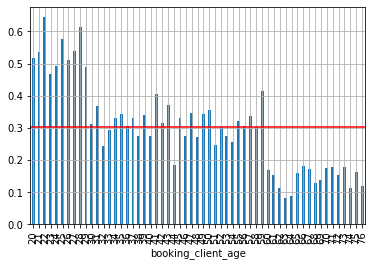

In [231]:
df.groupby('booking_client_age').is_canceled.mean().sort_index().plot.bar();
plt.axhline(df.is_canceled.mean(), c='r')
plt.grid()

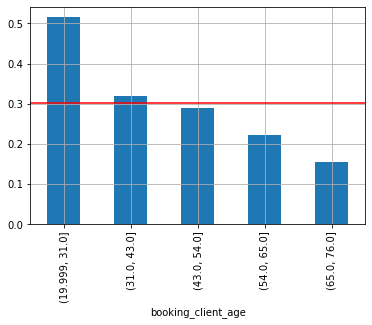

In [162]:
df.groupby(pd.qcut(df.booking_client_age, 5)).is_canceled.mean().sort_index().plot.bar();
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

A partir de estas gráficas es posible ver que las personas más jóvenes que realizan la reserva tienden a cancelar las reservas con mayor frecuencia que personas más mayores.

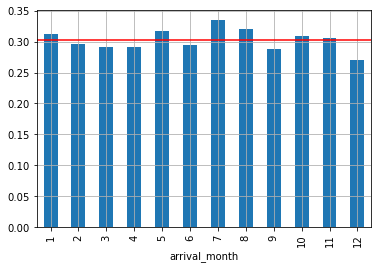

In [163]:
df.groupby('arrival_month').is_canceled.mean().plot.bar();
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

Parece que las reservas que tienen lugar en julio suelen ser las que suelen ser más canceladas, aunque no parece ser muy significativo ya que el resto de meses presentan valores similares.

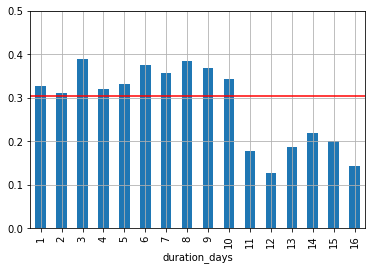

In [235]:
df.groupby('duration_days').is_canceled.mean().plot.bar(ylim=(0, 0.5))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

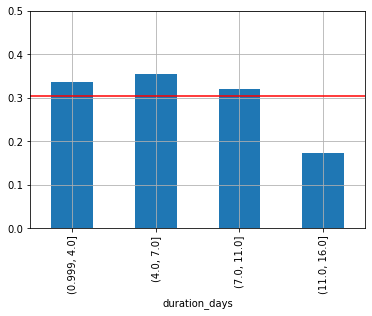

In [236]:
df.groupby(pd.qcut(df.duration_days, 4)).is_canceled.mean().plot.bar(ylim=(0, 0.5))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

Las reservas de estancias más cortas suelen tener mayor frecuencia de cancelación que estancias más largas.

### Creación de dummies

In [268]:
df['booking_client_age'] = pd.qcut(df.booking_client_age, 6)
df['booking_client_age'].head()

0      (49.0, 58.0]
1    (19.999, 29.0]
2      (66.0, 76.0]
3      (49.0, 58.0]
4      (66.0, 76.0]
Name: booking_client_age, dtype: category
Categories (6, interval[float64]): [(19.999, 29.0] < (29.0, 39.0] < (39.0, 49.0] < (49.0, 58.0] < (58.0, 66.0] < (66.0, 76.0]]

In [279]:
df['duration_days'] = pd.qcut(df.duration_days, 4)
df['duration_days']

0       (11.0, 16.0]
1       (0.999, 4.0]
2        (7.0, 11.0]
3       (11.0, 16.0]
4       (11.0, 16.0]
            ...     
4995      (4.0, 7.0]
4996    (11.0, 16.0]
4997    (11.0, 16.0]
4998    (0.999, 4.0]
4999      (4.0, 7.0]
Name: duration_days, Length: 5000, dtype: category
Categories (4, interval[float64]): [(0.999, 4.0] < (4.0, 7.0] < (7.0, 11.0] < (11.0, 16.0]]

In [295]:
df.groupby(['booking_client_age', 'duration_days']).is_canceled.describe()

count      mean       std  min  25%  50%  \
booking_client_age duration_days                                             
(19.999, 29.0]     (0.999, 4.0]   281.0  0.587189  0.493218  0.0  0.0  1.0   
                   (4.0, 7.0]     176.0  0.636364  0.482418  0.0  0.0  1.0   
                   (7.0, 11.0]    248.0  0.592742  0.492317  0.0  0.0  1.0   
                   (11.0, 16.0]   183.0  0.300546  0.459754  0.0  0.0  0.0   
(29.0, 39.0]       (0.999, 4.0]   229.0  0.353712  0.479168  0.0  0.0  0.0   
                   (4.0, 7.0]     173.0  0.369942  0.484190  0.0  0.0  0.0   
                   (7.0, 11.0]    225.0  0.302222  0.460245  0.0  0.0  0.0   
                   (11.0, 16.0]   161.0  0.204969  0.404938  0.0  0.0  0.0   
(39.0, 49.0]       (0.999, 4.0]   257.0  0.381323  0.486659  0.0  0.0  0.0   
                   (4.0, 7.0]     185.0  0.345946  0.476967  0.0  0.0  0.0   
                   (7.0, 11.0]    247.0  0.307692  0.462476  0.0  0.0  0.0   
                   (11.0, 16.0]   178.0  0.191011  0.394207  0.0  0.0  0.0   
(49.0, 58.0]       (0.999, 4.0]   245.0  0.297959  0.458298  0.0  0.0  0.0   
                   (4.0, 7.0]     201.0  0.393035  0.489644  0.0  0.0  0.0   
                   (7.0, 11.0]    266.0  0.323308  0.468621  0.0  0.0  0.0   
                   (11.0, 16.0]   176.0  0.159091  0.366804  0.0  0.0  0.0   
(58.0, 66.0]       (0.999, 4.0]   220.0  0.150000  0.357886  0.0  0.0  0.0   
                   (4.0, 7.0]     157.0  0.184713  0.389307  0.0  0.0  0.0   
                   (7.0, 11.0]    217.0  0.230415  0.422072  0.0  0.0  0.0   
                   (11.0, 16.0]   153.0  0.091503  0.289270  0.0  0.0  0.0   
(66.0, 76.0]       (0.999, 4.0]   245.0  0.195918  0.397718  0.0  0.0  0.0   
                   (4.0, 7.0]     187.0  0.187166  0.391092  0.0  0.0  0.0   
                   (7.0, 11.0]    226.0  0.137168  0.344788  0.0  0.0  0.0   
                   (11.0, 16.0]   164.0  0.067073  0.250915  0.0  0.0  0.0   

                                  75%  max  
booking_client_age duration_days            
(19.999, 29.0]     (0.999, 4.0]   1.0  1.0  
                   (4.0, 7.0]     1.0  1.0  
                   (7.0, 11.0]    1.0  1.0  
                   (11.0, 16.0]   1.0  1.0  
(29.0, 39.0]       (0.999, 4.0]   1.0  1.0  
                   (4.0, 7.0]     1.0  1.0  
                   (7.0, 11.0]    1.0  1.0  
                   (11.0, 16.0]   0.0  1.0  
(39.0, 49.0]       (0.999, 4.0]   1.0  1.0  
                   (4.0, 7.0]     1.0  1.0  
                   (7.0, 11.0]    1.0  1.0  
                   (11.0, 16.0]   0.0  1.0  
(49.0, 58.0]       (0.999, 4.0]   1.0  1.0  
                   (4.0, 7.0]     1.0  1.0  
                   (7.0, 11.0]    1.0  1.0  
                   (11.0, 16.0]   0.0  1.0  
(58.0, 66.0]       (0.999, 4.0]   0.0  1.0  
                   (4.0, 7.0]     0.0  1.0  
                   (7.0, 11.0]    0.0  1.0  
                   (11.0, 16.0]   0.0  1.0  
(66.0, 76.0]       (0.999, 4.0]   0.0  1.0  
                   (4.0, 7.0]     0.0  1.0  
                   (7.0, 11.0]    0.0  1.0  
                   (11.0, 16.0]   0.0  1.0

In [322]:
features = ['booking_client_age', 'duration_days', 'guests']
df[features].sample(3)

,booking_client_age,duration_days,guests
2260,"(49.0, 58.0]","(0.999, 4.0]",6
4869,"(58.0, 66.0]","(11.0, 16.0]",2
3730,"(66.0, 76.0]","(7.0, 11.0]",1


In [323]:
X_aux = df[features].copy()
y = df.is_canceled
X_aux.shape, y.shape

((5000, 3), (5000,))

In [324]:
X = pd.get_dummies(X_aux, columns=['booking_client_age','duration_days'])
X.sample(4)

,guests,"booking_client_age_(19.999, 29.0]","booking_client_age_(29.0, 39.0]","booking_client_age_(39.0, 49.0]","booking_client_age_(49.0, 58.0]","booking_client_age_(58.0, 66.0]","booking_client_age_(66.0, 76.0]","duration_days_(0.999, 4.0]","duration_days_(4.0, 7.0]","duration_days_(7.0, 11.0]","duration_days_(11.0, 16.0]"
3656,2,0,0,0,1,0,0,0,1,0,0
556,9,0,0,1,0,0,0,0,0,1,0
959,1,0,1,0,0,0,0,0,0,1,0
261,3,0,1,0,0,0,0,1,0,0,0


## Modelado

- Divide el dataset generado en el paso anterior en entrenamiento y test siguiendo una proporción 0.8 - 0.2
- Haz uso del comando GridSearchCV junto con mallas de hiperparámetros (param_grid) y los modelos predictivos de árbol de decisión para clasificación y regresión logística estudiados, para generar un modelo predictivo óptimo que maximice la puntuación **f1-score**
- Para la mejor regresión logística obtenida, observa y pinta los coeficientes y realiza algún comentario u observación al respecto.
- Para el mejor árbol de decisión obtenido,  observa y pinta la importancia de atributos (feature importances) y realiza algún comentario u observación al respecto.
- Para el mejor modelo obtenido por la búsqueda GridSearchCV, realiza la predicción en TEST, y aporta las métricas accuracy, precission, recall así como la matriz de confusión, para el umbral estándar (0.5)

- Para este mejor modelo, busca el umbral que satisfaga las siguientes condiciones, evaluando en TEST:
    - Umbral mínimo que garantiza una precission del 80 %
    - Umbral máximo que garantiza un recall del 60 %
    - Umbral que maximiza la f1 score
- Para el umbral que maximiza la f1, reporta los rendimientos f1 agrupando por hotel, ¿ para qué hoteles obtienes un peor rendimiento? 

In [325]:
df["is_canceled"].value_counts()

0    3486
1    1514
Name: is_canceled, dtype: int64

In [326]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 11), (4000,), (1000, 11), (1000,))

### Regresión logística

In [327]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [328]:
C_vec = [0.001, 0.05, 0.01, 0.05, 1, 2, 5, 10]
param_grid = {"C": C_vec}

grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000),
                           param_grid=param_grid,
                           scoring='f1',
                           n_jobs=6,
                           refit=True)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=1000), n_jobs=6,
             param_grid={'C': [0.001, 0.05, 0.01, 0.05, 1, 2, 5, 10]},
             scoring='f1')

In [329]:
grid_search.best_params_

{'C': 1}

In [330]:
grid_search.best_score_

0.39313023435439504

In [333]:
coeff_series = pd.Series(grid_search.best_estimator_.coef_[0], index=X_train.columns).sort_values()
coeff_series

booking_client_age_(66.0, 76.0]     -0.895039
duration_days_(11.0, 16.0]          -0.712221
booking_client_age_(58.0, 66.0]     -0.667088
guests                               0.050641
booking_client_age_(49.0, 58.0]      0.077001
booking_client_age_(39.0, 49.0]      0.138519
duration_days_(7.0, 11.0]            0.195242
booking_client_age_(29.0, 39.0]      0.202934
duration_days_(0.999, 4.0]           0.213083
duration_days_(4.0, 7.0]             0.303936
booking_client_age_(19.999, 29.0]    1.143715
dtype: float64

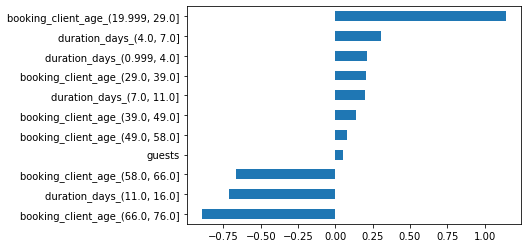

In [334]:
coeff_series.plot.barh()

Al representar los diferentes coeficientes del modelo, se puede apreciar que aquellos que tienen valor negativo corresponden con las categorías que en el estudio de las variables (EDA) pudieron ser interpretadas a partir de los gráficos como categorías menos influyentes que afectaban a la cancelación de la reserva, esto es: clientes de edades entre los 58-76 años y aquellas reservas que son de larga duración (> 11 días).

### Árbol de decisión

In [335]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "max_leaf_nodes": [2 ** 4, 2 ** 6, 2 ** 8],
    "min_samples_leaf": [20, 60, 100]
}

grid_searchDT = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           scoring='f1',
                           n_jobs=6,
                           refit=True)
grid_searchDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=6,
             param_grid={'max_leaf_nodes': [16, 64, 256],
                         'min_samples_leaf': [20, 60, 100]},
             scoring='f1')

In [336]:
grid_searchDT.best_params_

{'max_leaf_nodes': 64, 'min_samples_leaf': 20}

In [309]:
grid_searchDT.best_score_

0.36524182974323116

In [338]:
grid_searchDT.best_estimator_.feature_importances_

array([0.13949811, 0.43900221, 0.00701026, 0.01022159, 0.01311075,
       0.07663821, 0.08743502, 0.03337245, 0.01067965, 0.0145545 ,
       0.16847726])

In [339]:
importance_series = pd.Series(grid_searchDT.best_estimator_.feature_importances_, index=X_train.columns).sort_values()
importance_series

booking_client_age_(29.0, 39.0]      0.007010
booking_client_age_(39.0, 49.0]      0.010222
duration_days_(4.0, 7.0]             0.010680
booking_client_age_(49.0, 58.0]      0.013111
duration_days_(7.0, 11.0]            0.014555
duration_days_(0.999, 4.0]           0.033372
booking_client_age_(58.0, 66.0]      0.076638
booking_client_age_(66.0, 76.0]      0.087435
guests                               0.139498
duration_days_(11.0, 16.0]           0.168477
booking_client_age_(19.999, 29.0]    0.439002
dtype: float64

<AxesSubplot:>

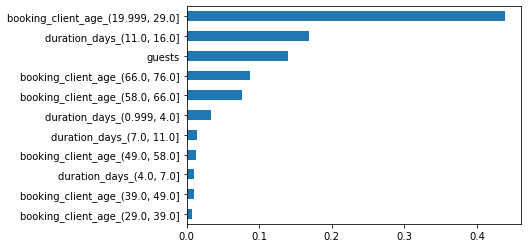

In [340]:
importance_series.plot.barh()

A partir de esta representación se ve que aquellas que han sido menos decisivas a la hora de realizar la clasificación durante el entrenamiento, corresponden con los rangos intermedios de las variables 'booking_client_edad' y 'duration_days'. Es decir, que los grupos de edad más decisivos han sido los más jóvenes (20-29 años) y los clientes de mayor edad (de 58 a 76 años). Con respecto a la duración de la estancia, también presentan mayor peso los grupos de los extremos, sobre todo, reservas más largas (de 12-16 días). 

También se aprecia que el número de huéspedes en la reserva posee un peso considerable a la hora de determinar si la reserva se cancela o no.

### Predicción con mejor modelo obtenido por GridSearchCV

In [344]:
if grid_search.best_score_ > grid_searchDT.best_score_:
    model = grid_search.best_estimator_
else:
    model = grid_searchDT.best_estimator_
model

LogisticRegression(C=1, max_iter=1000)

In [345]:
y_test_pred = model.predict(X_test)

In [346]:
from sklearn.metrics import classification_report, f1_score
from sklearn.metrics import precision_score, recall_score, f1_score

print(classification_report(y_test, y_test_pred))
print("Precission:", precision_score(y_true=y_test, y_pred=y_test_pred))
print("Recall:", recall_score(y_true=y_test, y_pred=y_test_pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       696
           1       0.60      0.25      0.36       304

    accuracy                           0.72      1000
   macro avg       0.67      0.59      0.59      1000
weighted avg       0.70      0.72      0.68      1000

Precission: 0.5968992248062015
Recall: 0.2532894736842105
F1-score: 0.3556581986143187


In [347]:
y_test_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

In [348]:
THRESHOLD = 0.5

pred = (y_test_pred_proba > THRESHOLD).astype('int')
print("Precission:", precision_score(y_true=y_test, y_pred=pred))
print("Recall:", recall_score(y_true=y_test, y_pred=pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=pred))

Precission: 0.5968992248062015
Recall: 0.2532894736842105
F1-score: 0.3556581986143187


In [349]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Precission: 0.5968992248062015
Recall: 0.2532894736842105
F1-score: 0.3556581986143187


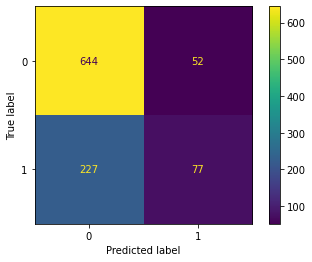

In [359]:
threshold = 0.5
labels = [0, 1]

custom_prediction = y_test_pred_proba > threshold
cm = confusion_matrix(y_true, 
                      custom_prediction, 
                      labels=labels)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
print("Precission:", precision_score(y_true=y_test, y_pred=custom_prediction))
print("Recall:", recall_score(y_true=y_test, y_pred=custom_prediction))
print("F1-score:", f1_score(y_true=y_test, y_pred=custom_prediction))
disp.plot()
plt.show()

Utilizando el umbral 0.5, el modelo no es del todo óptimo. 

Para empezar hay un porcentaje del 25% para el recall, es decir, que hay una tasa baja de ausencia de falsos negativos, esto significa que el modelo predice 3 de cada 4 casos que la reserva **no** se cancela cuando en realidad **sí** que se cancela. Por tanto, es poco interesante para nuestro objetivo.

Con respecto al valor de precision, aproximadamente, del 60%, se trata de un resultado relativamente bueno, ya que puede asegurar que en 6 de cada 10 casos no se producirá un falso positivo.

### Umbral mínimo para precision 80%

In [368]:
threshold_list = np.linspace(0, 1, 21)[1:-1]
test_precision_score_list = []

NEEDED_METRIC = 0.8

for threshold in threshold_list:
    pred = (y_test_pred_proba > threshold).astype('int')
    metric = precision_score(y_true=y_test, y_pred=pred)
    test_precision_score_list.append(metric)
    if metric >= NEEDED_METRIC:
        break
        
threshold, metric

(0.65, 1.0)

El umbral mínimo con el que se puede alcanzar el 80% de precisión es de 0.65

### Umbral máximo para recall 60%

In [363]:
threshold_list = np.linspace(0, 1, 21)[1:-1][::-1]
test_recall_score_list = []

NEEDED_METRIC = 0.6

for threshold in threshold_list:
    pred = (y_test_pred_proba > threshold).astype('int')
    metric = recall_score(y_true=y_test, y_pred=pred)
    test_recall_score_list.append(metric)
    if metric >= NEEDED_METRIC:
        break
        
threshold, metric

(0.30000000000000004, 0.7072368421052632)

Para poder asegurar un 60% de recall, es necesario un umbral de 0.3

### Umbral que maximiza f1

In [369]:
threshold_list = np.linspace(0, 1, 21)[1:-1]
test_f1_score_list = []

for threshold in threshold_list:
    pred = (y_test_pred_proba > threshold).astype('int')
    metric = f1_score(y_true=y_test, y_pred=pred)
    test_f1_score_list.append(metric)
    
threshold_list

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [370]:
test_f1_score_list

[0.4662576687116564,
 0.482200647249191,
 0.48776223776223776,
 0.5298759864712513,
 0.5221445221445221,
 0.5119047619047619,
 0.4557823129251701,
 0.41613588110403393,
 0.3648648648648649,
 0.3556581986143187,
 0.35648148148148145,
 0.125748502994012,
 0.032362459546925564,
 0.006557377049180327,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [371]:
threshold_list[np.argmax(test_f1_score_list)]

0.2

In [372]:
def moving_avg(x, w):
    return np.convolve(x, np.ones(w), 'same') /w

smoothed_test_f1_score_arr = moving_avg(test_f1_score_list,3)
smoothed_test_f1_score_arr

array([0.31615277, 0.47874018, 0.49994629, 0.51326092, 0.52130842,
       0.49661053, 0.46127432, 0.41226102, 0.37888631, 0.35900151,
       0.27929606, 0.17153081, 0.05488945, 0.01297328, 0.00218579,
       0.        , 0.        , 0.        , 0.        ])

In [373]:
optimal_threshold= threshold_list[np.argmax(smoothed_test_f1_score_arr)]
optimal_threshold

0.25

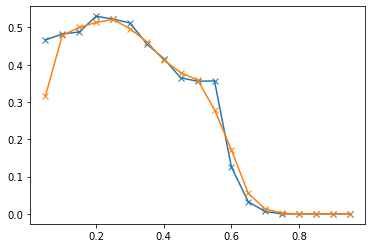

In [374]:
plt.plot(threshold_list, test_f1_score_list, 'x-')
plt.plot(threshold_list, smoothed_test_f1_score_arr, 'x-')

El umbral que maximiza el valor de f1 es 0.25

### Rendimientos f1 agrupando por hotel

In [376]:
THRESHOLD = optimal_threshold

pred = (y_test_pred_proba > THRESHOLD).astype('int')
print("Precission:", precision_score(y_true=y_test, y_pred=pred))
print("Recall:", recall_score(y_true=y_test, y_pred=pred))
print("F1-score:", f1_score(y_true=y_test, y_pred=pred))

Precission: 0.4043321299638989
Recall: 0.7368421052631579
F1-score: 0.5221445221445221


# Análisis final

Tenemos una entrevista con el departamento de marketing de la empresa para explicar los modelos obtenidos y el análisis en profundidad acometido, que asentará nuestro amplio conocimiento y habilidades analíticas de cara a la cadena hotelera y nos garantizará futuros contratos, nos preguntan elementos esenciales como:

- ¿ qué hoteles o países de hoteles tienen una mayor tasa de cancelación? 

_Destacan los hoteles GGE, NAD, BXO, LMD, IKL por presentar una tasa muy superior a la media_

- ¿ qué países de cliente tienen una mayor tasa de cancelación?

_Groenlandia, Aruba, Bielorrusia, Mauritania, Brasil, Austria y Bangladesh._

- ¿ existen rangos de edad para los cuales la tasa de cancelación es mayor o menor que la media?

_Sí. Como se ha visto en la EDA de las nuevas variables creadas a partir de las iniciales, los jóvenes de entre 20-29 años tienden a realizar más cancelaciones que personas de mayor edad (entre los 58 y 76 años), quedándo estos últimos muy por debajo de la media._

- ¿ afecta la anticipación en la reserva de algún modo a la tasa de cancelación?

_No se ha estudiado esta variable._


- ¿ hay algún tipo de habitación que sufra mayor propensión a las cancelaciones?

_Se puede ver una tendencia que indica que aquellas reservas en las que las habitaciones son de los tipos menos comunes (luxury, triple, suite) superan la media de cancelaciones._

- ¿ afecta la distribución de los huéspedes de algún modo a la tasa de cancelación?

_Se ha podido analizar que aquellas reservas en donde el número de huéspedes es superior a 4 personas, la tasa de cancelación es más alta._

- ¿ afectan los servicios disponibles del hotel a la tasa de cancelación?

_En en análisis de la EDA inicial se pudo comprobar que la tasa de cancelaciones era similar con respecto a las reservas no canceladas para cualquier servicio del hotel. Por lo que las instalaciones que posea el hotel no parecen ser decisivas a la hora de realizar una cancelación._

- ¿ qué activaciones de marketing/comerciales podemos realizar sobre la predicción del modelo de cancelaciones para reducir las mismas y mejorar la tasa de reservas que se completan?

_Si se trata de una persona jóven, se podría ofrecer un descuento en la próxima reserva que se realice una vez finalice la reserva que acaba de realizar.
Si es un grupo numeroso, podría ofrecerse un paquete de actividades en grupo acorde al destino de la reserva para hacer más atractiva la estancia y evitar que sea cancelada.
En caso de que la reserva sea en alguno de los hoteles que presentan más tasa de cancelación, se podría ofrecer para su reserva incluir el desayuno y/o regalar un pack de bienvenida (p. ej. bolsa de aseo equipada, cesta de alimentos/bebida ...)._


Dependiendo de la brillantez en la exposición del modelo, su rendimiento y los resultados analíticos, Disfrutín iniciará con nosotros una feliz relación de colaboración en tareas de ciencia de datos, o seremos una consultora más quedará atrás tras meter un pufo en el proyecto como impostores.

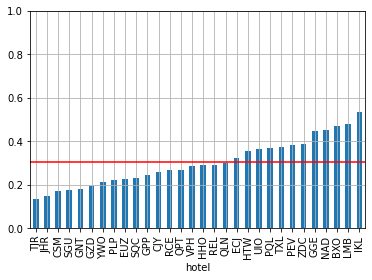

In [381]:
df.groupby('hotel').is_canceled.mean().sort_values().plot.bar(ylim=(0,1))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

Hay un grupo de hoteles que presentan una mayor cantidad de cancelaciones en comparación con el resto.

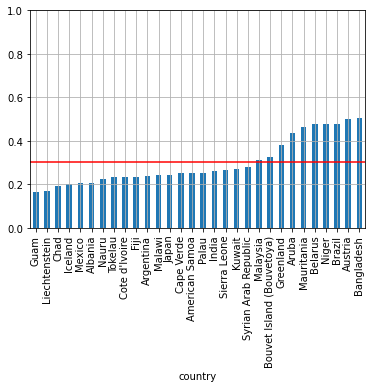

In [382]:
df.groupby('country').is_canceled.mean().sort_values().plot.bar(ylim=(0,1))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

Parece que el país al que pertenezcan las personas que realizan las reservas influye de cierta manera a la cancelación de la reserva.

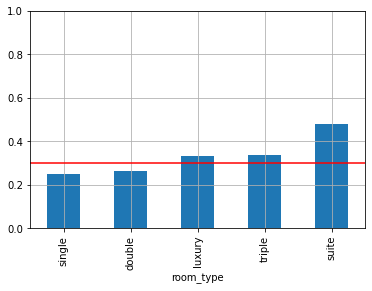

In [383]:
df.groupby('room_type').is_canceled.mean().sort_values().plot.bar(ylim=(0,1))
plt.axhline(df.is_canceled.mean(), c='r');
plt.grid()

El tipo de habitación parece que afecta a la cancelación de la reserva.